## 1. Import des librairies

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# print(os.listdir("../input"))
%matplotlib inline
sns.set({'figure.figsize':(16,8)})

## 2. Chargement et exploration du Dataset

In [2]:
#train_data=pd.read_csv("../input/train.csv")
#test_data=pd.read_csv("../input/test.csv")
train_data=pd.read_csv("/Users/mbp/Desktop/HETIC/KAGGLE/nyc-taxi-trip-duration/train.csv")
test_data=pd.read_csv("/Users/mbp/Desktop/HETIC/KAGGLE/nyc-taxi-trip-duration/test.csv")

train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [3]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
print(test_data.shape)
print(train_data.shape)

(625134, 9)
(1458644, 11)


## 3. Verification des doublons

In [5]:
print(f"Data Frame a {train_data.shape[0]} lignes et {train_data.shape[1]} colonnes")
print(f"La colonne d'id a {train_data.id.nunique()} de la valeur identique")
train_data.duplicated().sum()

Data Frame a 1458644 lignes et 11 colonnes
La colonne d'id a 1458644 de la valeur identique


0

On n'a aucun doublon dans le Dataset

## 4. Verification des données manquantes

In [6]:
train_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## 5. Analyse des outliers

Text(0.5, 0.98, 'Analyse des outliers')

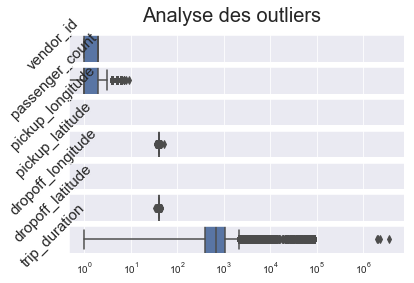

In [7]:
fig, ax = plt.subplots(7, sharex=True)
for i,c in enumerate(["vendor_id","passenger_count","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","trip_duration"]):
    sns.boxplot(train_data[c],ax=ax[i],width=1.5)
    ax[i].set_xscale("log")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(c, fontsize=15,rotation=45)
fig.suptitle('Analyse des outliers', fontsize=20)


On a beaucoup de outliers dans des colonnes numériques, mais on ne pourrait pas les supprimer parce qu'ils influencent sur la prédiction du projet

- De plus 'Trip duration' en compte le plus et c'est la feature qu'on cherche à prédire



## 6. Conversion des données et attribution des variables

In [8]:
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [9]:
train_data["store_and_fwd_flag"]=np.where(train_data["store_and_fwd_flag"] == "N",0,1)
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435


In [10]:
X=train_data[['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']]
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2,1,-73.982155,40.767937,-73.964630,40.765602
1,1,1,-73.980415,40.738564,-73.999481,40.731152
2,2,1,-73.979027,40.763939,-74.005333,40.710087
3,2,1,-74.010040,40.719971,-74.012268,40.706718
4,2,1,-73.973053,40.793209,-73.972923,40.782520


In [11]:
y=train_data['trip_duration']
y.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

## 7. Train/Test Split

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score;

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1166915, 6), (1166915,), (291729, 6), (291729,))

In [14]:
rf = RandomForestRegressor()


## 8. Modeling

In [15]:
rf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## 9. Prediction

In [16]:
pred = rf.predict(X_test)
pred

array([ 862.3, 1151.5,  473.4, ...,  768. ,  833.1, 1162.7])

In [17]:
from sklearn.metrics import mean_squared_log_error 

In [18]:
print(mean_squared_log_error(y_test,pred))

0.3372993296658042


In [19]:
# submission =pd.read_csv("../input/sample_submission.csv")
submission =pd.read_csv("/Users/mbp/Desktop/HETIC/KAGGLE/nyc-taxi-trip-duration/train.csv")
submission.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [20]:
test_pred = rf.predict(test_data[['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']])
print(test_pred)

[ 991.6  569.   695.9 ... 1830.9 1842.  1288.1]


In [21]:
my_submission = pd.DataFrame({'id': test_data.id, 'trip_duration': test_pred})
my_submission.head()

,id,trip_duration
0,id3004672,991.6
1,id3505355,569.0
2,id1217141,695.9
3,id2150126,1020.4
4,id1598245,701.3


In [22]:
my_submission.to_csv('/Users/mbp/Desktop/HETIC/KAGGLE/nyc-taxi-trip-duration/submission.csv', index=False)